In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
target = lambda x: stats.norm(-4, 0.5).pdf(x) + stats.norm(4, 1).pdf(x)

In [3]:
n_iter = 1000
x = {}
for eps in [0.5, 1, 2, 4]:
    xi = 0
    x[eps] = np.zeros(n_iter)
    for i in range(n_iter):
        candidate = stats.norm(xi, eps).rvs()
        if stats.uniform.rvs() < (target(candidate) / target(xi)):
            xi = candidate
        x[eps][i] = xi

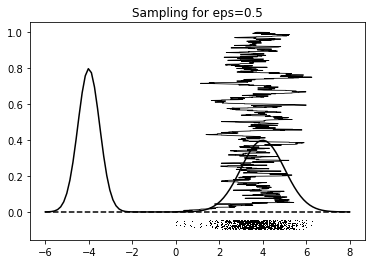

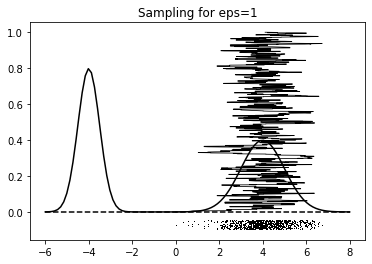

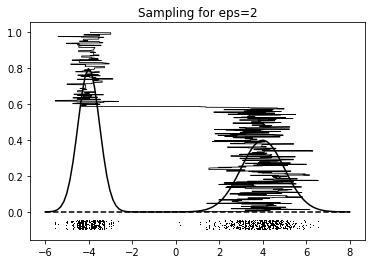

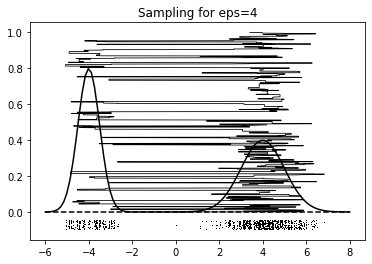

In [4]:
theta = np.linspace(-6, 8, 100)
noise = np.random.uniform(-0.05, -0.1, n_iter)
for eps, vals in x.items():
    plt.plot(theta, target(theta), label=f"target", color="black")
    plt.plot([-6, 8], [0, 0], linestyle="--", color="black")
    plt.plot(vals, noise, ",", color="black")
    plt.plot(vals, np.linspace(0, 1, n_iter), color="black", linewidth=0.8)
    plt.title(f"Sampling for eps={eps}")
    plt.show()

The best epsilon seems to be 4. It's high enough that we spend lots of time in both distributions.